# Importing Liabraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [105]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [106]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [107]:
data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.000235,0.000304,-0.007259,0.004557,0.005110,0.010724,-0.006509,0.000575,0.007779,0.042146,0.011111,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.008315,-0.008971,0.008305,0.004940,0.003936,-0.002826,-0.007843,0.007902,0.005931,-0.042806,0.004844,-0.004450
Patient_ID,0.000235,0.008315,1.000000,0.014015,-0.023189,-0.005371,-0.012235,-0.006363,-0.004678,0.000746,0.007838,0.042348,-0.008344,-0.004214
Patient_Age,0.000304,-0.008971,0.014015,1.000000,-0.006560,-0.027559,-0.013554,-0.012989,0.003471,-0.004523,0.006697,0.117190,-0.019371,-0.074934
Patient_Body_Mass_Index,-0.007259,0.008305,-0.023189,-0.006560,1.000000,0.019681,0.002384,-0.016850,-0.008383,-0.003661,-0.015598,-0.140303,-0.014036,-0.121844
A,0.004557,0.004940,-0.005371,-0.027559,0.019681,1.000000,-0.063683,-0.089832,-0.076064,-0.163082,-0.054378,-0.072338,0.170448,-0.049886
B,0.005110,0.003936,-0.012235,-0.013554,0.002384,-0.063683,1.000000,-0.021175,-0.002050,-0.017804,-0.016013,-0.009692,0.392773,-0.049805
C,0.010724,-0.002826,-0.006363,-0.012989,-0.016850,-0.089832,-0.021175,1.000000,0.007528,-0.026294,0.000903,-0.011624,0.445349,-0.033356
D,-0.006509,-0.007843,-0.004678,0.003471,-0.008383,-0.076064,-0.002050,0.007528,1.000000,-0.013478,-0.009650,-0.007368,0.320736,-0.105710
E,0.000575,0.007902,0.000746,-0.004523,-0.003661,-0.163082,-0.017804,-0.026294,-0.013478,1.000000,-0.005260,-0.019637,0.541840,0.021527


In [108]:
data.iloc[:,0:1]

,ID_Patient_Care_Situation
0,22374
1,18164
2,6283
3,5339
4,33012
...,...
23092,15613
23093,15503
23094,2167
23095,31646


In [109]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [110]:
(data['Patient_Age']<50).value_counts() # Patients below the age of 50

True     17058
False     6039
Name: Patient_Age, dtype: int64

In [111]:
data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

# Data Visualization

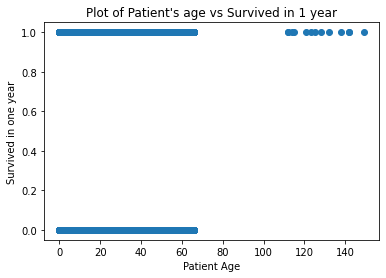

In [112]:
plt.scatter(data.Patient_Age,data.Survived_1_year)  # Age distribution of patients survived in one year
plt.title("Plot of Patient's age vs Survived in 1 year")
plt.xlabel('Patient Age')
plt.ylabel("Survived in one year")
plt.show()

# Data Preprocessing

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [114]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [115]:
data=data.drop(['Patient_ID'],axis=1)

In [116]:
data['Patient_Rural_Urban'] =data['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'RURAL' else 0)

In [117]:
data['Patient_mental_condition'] = data['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)

In [118]:
data['Patient_Smoker'] = data['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)


In [119]:
data=data.dropna()

In [120]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [121]:
data = pd.get_dummies(data, columns=['Treated_with_drugs'])

In [122]:
data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,22374,8,56,18.479385,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,18164,5,36,22.945566,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6283,23,48,27.510027,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5339,51,5,19.130976,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,10808,45,47,26.155120,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,5138,52,53,19.103244,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,17265,9,3,18.126976,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,24349,47,62,25.074482,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,1647,17,46,17.663877,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10,14892,8,60,18.690567,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Seperating Input and Output

In [123]:
x=data.drop(['Survived_1_year'],axis=1)
y=data.Survived_1_year

# Train Test data split

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [125]:
np.shape(x_train)

(17479, 47)

In [126]:
np.shape(x_test)

(4370, 47)

# Building Model

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rfc=RandomForestClassifier(criterion='entropy',n_estimators=1000,max_depth=20,random_state=23)

In [129]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [130]:
pred=rfc.predict(x_test)

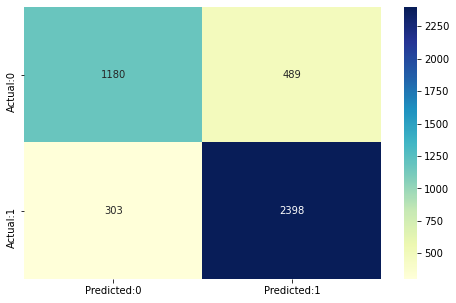

In [131]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [132]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [154]:
print('The acuuracy of the model.....',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy ..... ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity .....',TP/float(TP+FN),'\n',

'Specificity ..... ',TN/float(TN+FP),'\n',

'Positive Predictive value .....',TP/float(TP+FP),'\n',

'Negative predictive Value ......',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio ..... ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio ..... ',(1-sensitivity)/specificity)


The acuuracy of the model..... 0.8187643020594966 
 The Missclassification = 1-Accuracy .....  0.18123569794050343 
 Sensitivity ..... 0.8878193261754905 
 Specificity .....  0.7070101857399641 
 Positive Predictive value ..... 0.8306200207828195 
 Negative predictive Value ...... 0.7956844234659474 
 Positive Likelihood Ratio .....  3.030205430239047 
 Negative likelihood Ratio .....  0.15866910560432737


In [134]:
from sklearn.metrics import accuracy_score,f1_score

In [135]:
from sklearn.metrics import recall_score,make_scorer
recall_score(y_test,pred)

0.8878193261754905

In [136]:
f1_score(y_test,pred)

0.858267716535433

In [137]:
a=accuracy_score(y_test,pred)
a

0.8187643020594966

# Hyper parameter tunning

In [142]:
from sklearn.model_selection import GridSearchCV

In [155]:
# Defined a custom function for implementing hyper parameter tuning
def gridfunc(classifier, parameter, x_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, return_train_score=True)
    grid_obj = grid_obj.fit(x_train, y_train) 
    return grid_obj

In [143]:
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_ 
    mean_test_scores = grid_obj.cv_results_['mean_test_score'] 
    mean_train_scores = grid_obj.cv_results_['mean_train_score'] 
    plt.figure(figsize=(10,8))
    all_vals = list(grid_obj.param_grid.values())
    param_values =[str(x) for x in all_vals[0]]
    x = np.arange(1, len(param_values)+1)
    plt.plot(x,mean_train_scores, c='r', label='Train set') 
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g', label='Test set') 
    plt.xlabel(list(grid_obj.param_grid.keys())[0]) 
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [144]:
classifier = RandomForestClassifier(random_state=23)


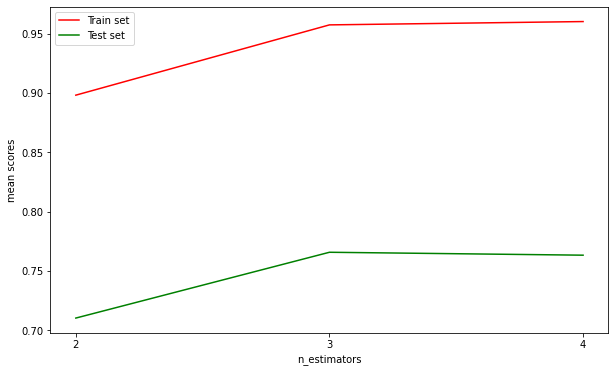

In [145]:
# plotting the graph using created function to find the variation in model for given n_estimators -- NEEDS LEGEND

grid = gridfunc(classifier,{'n_estimators': [2, 3, 4]} , x_train, y_train)
hp_cv_scores(grid)

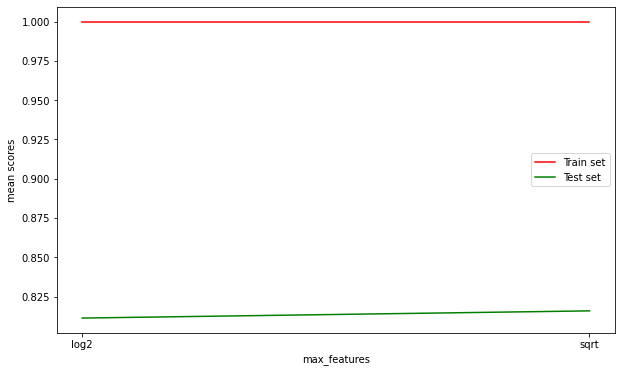

In [146]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , x_train, y_train)
hp_cv_scores(grid)

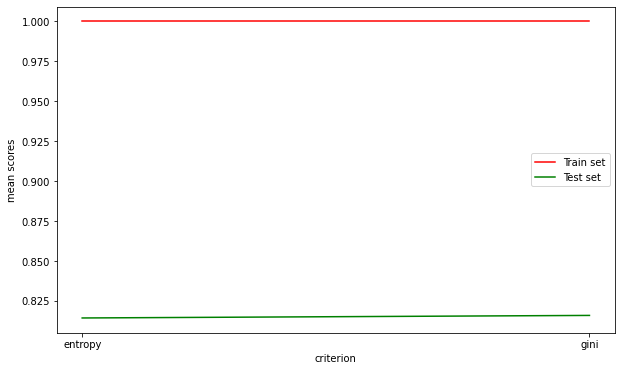

In [147]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , x_train, y_train)
hp_cv_scores(grid)

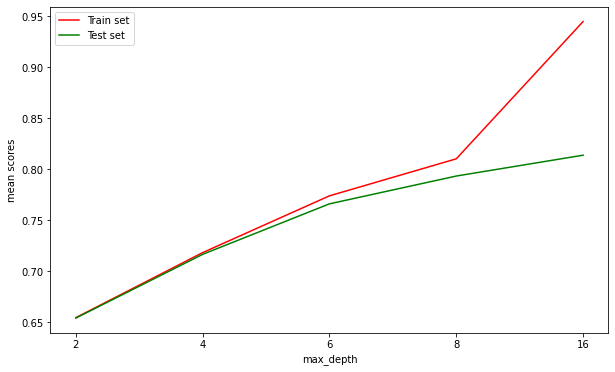

In [148]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , x_train, y_train)
hp_cv_scores(grid)

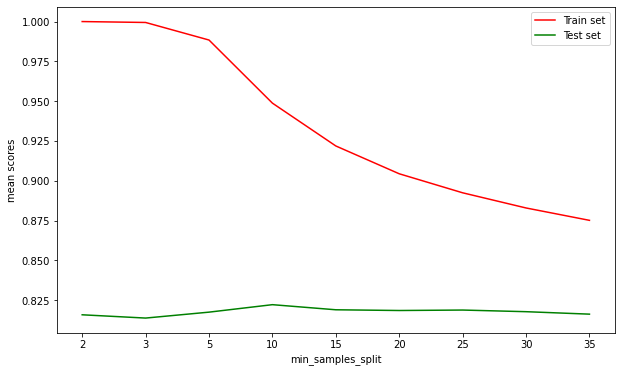

In [149]:
# plotting the graph to find the variation in model for given min samples split

grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , x_train, y_train)
hp_cv_scores(grid)

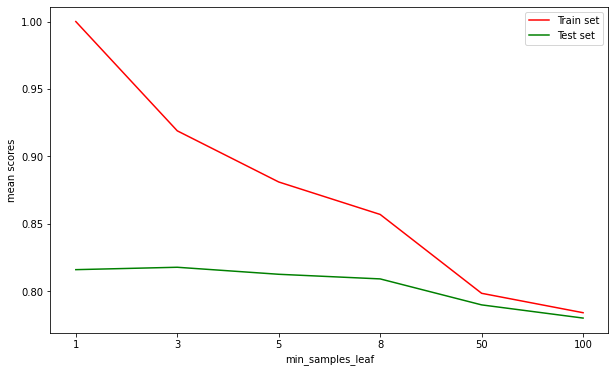

In [150]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , x_train, y_train)
hp_cv_scores(grid)


In [152]:
param_grid = {'n_estimators':[i for i in range(10, 110, 10)],
              'max_depth':[i for i in range(2, 6)],
              'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2', None]}

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, verbose=2, scoring='accuracy')
clf.fit(x_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  criterion=gini, max_depth=3, max_features=None, n_estimators=10, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=None, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=None, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=None, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=None, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=None, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=None, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=None, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=None, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=None, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=None, n_estimators=10, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=None, n_estimators=10 .
[CV]  criteri

[Parallel(n_jobs=1)]: Done 3200 out of 3200 | elapsed: 36.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [166]:
y_predi=clf.predict(x_test)

In [169]:
acc=accuracy_score(y_test,y_predi)
print("Tuned model ....",np.round(acc,4),np.round(f1_score(y_test,y_predi),4))
print("Untuned model ..",np.round(a,4),np.round(f1_score(y_test,pred),4))

Tuned model .... 0.7886 0.8351
Untuned model .. 0.8188 0.8583


So , I am go with baseline model

# Taking Predictions for test data

In [156]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')


In [157]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [158]:
test_new['Patient_Rural_Urban'] = test_new['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'RURAL' else 0)
test_new['Patient_mental_condition'] = test_new['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)

In [159]:
test_new = pd.get_dummies(test_new, columns=['Treated_with_drugs'])

In [160]:
test_new=test_new.drop(['Patient_ID'],axis=1)

In [161]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,19150,40,16,29.443894,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,23216,52,24,26.836321,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,11890,50,63,25.523280,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,7149,32,42,27.171155,0,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22845,20,50,25.556192,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [162]:
survived=rfc.predict(test_new)

# Downloading csv file

In [163]:
res = pd.DataFrame(survived) 
res.index = test_new.index 
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction.csv')         
files.download('prediction.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>